![image info](https://ineuron.ai/images/ineuron-logo.png)

###  Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/hr_preprocessed.csv')

#### Show Top 5 Records

In [3]:
df.head()

,city,city_development_index,experience,company_size,last_new_job,training_hours,target,gender Female,gender Male,gender Other,...,major_discipline Humanities,major_discipline No Major,major_discipline Other,major_discipline STEM,company_type Early Stage Startup,company_type Funded Startup,company_type NGO,company_type Other,company_type Public Sector,company_type Pvt Ltd
0,103,-0.044130,10.271582,2,0.693147,4.821240,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40,-0.062109,8.340147,1,1.791759,5.305129,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,21,-0.065823,4.060962,2,0.000000,6.411223,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,115,-0.061446,-1.017357,2,0.000000,5.494240,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,162,-0.062518,10.271582,1,1.609438,2.455184,0.0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


#### Shape of the dataset

In [4]:
df.shape

(19158, 33)

#### Split X and Y
#### Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “target” column.

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis=1)
y = df['target']

#### Resampling
#### The distribution of target feature has a lot more samples in '0' than in '1'. Therefore, we will use the SMOTE class to resample our data

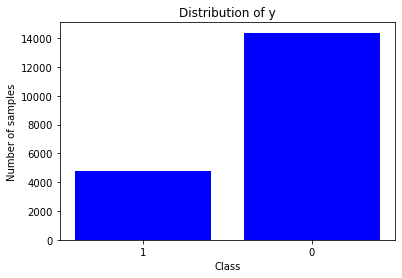

In [6]:
count = Counter(y)
plt.bar(['1', '0'], count.values(), color='blue')
plt.title('Distribution of y')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [7]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

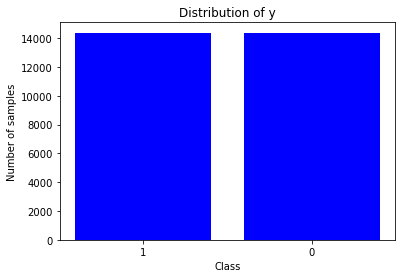

In [8]:
count = Counter(y)
plt.bar(['1', '0'], count.values(), color='blue')
plt.title('Distribution of y')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

#### Train Test Split
- An extremely common practice among people who wish to predict data is to split the X and y into train and test sets, which is what we do in the cell below. The test set has 20% of data, while the train has 80%.

In [9]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((23009, 32), (5753, 32))

In [10]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9987
- Precision: 0.9984
- Recall: 0.9990
- Roc Auc Score: 0.9987
----------------------------------
Model performance for Test set
- Accuracy: 0.8465
- F1 score: 0.8465
- Precision: 0.8537
- Recall: 0.8362
- Roc Auc Score: 0.8465


Decision Tree
Model performance for Training set
- Accuracy: 0.9988
- F1 score: 0.9988
- Precision: 1.0000
- Recall: 0.9976
- Roc Auc Score: 0.9988
----------------------------------
Model performance for Test set
- Accuracy: 0.7879
- F1 score: 0.7879
- Precision: 0.7853
- Recall: 0.7924
- Roc Auc Score: 0.7879


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8362
- F1 score: 0.8362
- Precision: 0.8399
- Recall: 0.8309
- Roc Auc Score: 0.8362
----------------------------------
Model performance for Test set
- Accuracy: 0.8342
- F1 score: 0.8342
- Precision: 0.8374
- Recall: 0.8293
- Roc Auc Score: 0.8342


Logistic Regression
Model performance for Training 

#### Here we can use  CatBoost Classifier for Hyper Parameter Tuning

In [11]:
#Initialize few parameter for Hyperparamter tuning
cat_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [5, 8, 12, 20, 30]}

In [12]:
# Model  for Hyperparameter tuning
randomcv_model = [
                 ('CatBoost', CatBoostClassifier(verbose=False), cat_params)
                   ]

In [13]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for CatBoost -------------------
{'max_depth': 12, 'learning_rate': 0.01}


#### Retraining the Model with best Parameters

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve
models = {
    "CatBoosting Classifier": CatBoostClassifier(max_depth= 12, learning_rate= 0.01,verbose=False),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9033
- F1 score: 0.9033
- Precision: 0.9035
- Recall: 0.9030
- Roc Auc Score: 0.9033
----------------------------------
Model performance for Test set
- Accuracy: 0.8543
- F1 score: 0.8543
- Precision: 0.8538
- Recall: 0.8550
- Roc Auc Score: 0.8543




In [16]:
best_model = CatBoostClassifier(max_depth= 12, learning_rate= 0.1,verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'CATBOOST'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'CATBOOST'
Accuracy Score value: 0.8505
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      2877
         1.0       0.86      0.83      0.85      2876

    accuracy                           0.85      5753
   macro avg       0.85      0.85      0.85      5753
weighted avg       0.85      0.85      0.85      5753



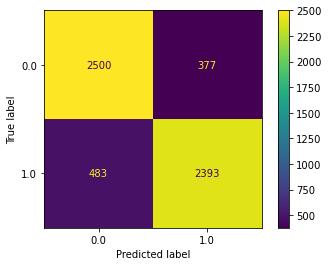

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

#### Best Model is CatBoost Classifier with 99.37 % Accuracy and also performed well in Cross validation

In [18]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_model, open('models/hr_model.pkl', 'wb'))